# illustrates the use of the `indices` class for a single proxy and an ensemble of proxies 

In [1]:
%matplotlib inline

In [2]:
import os 
import sys
import pathlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### import the development version of paleopy

In [4]:
from paleopy import proxy 
from paleopy.plotting import indices

### determine the current working directory 

In [5]:
cwd = pathlib.Path.cwd() 

In [6]:
print(cwd)

/home/nicolasf/research/PICT_notebooks/notebooks


### example 1: defines one proxy

#### defines the folder where the JSON files are (for the datasets) and where the proxy JSON files are saved 

In [7]:
djsons = cwd.parent.joinpath('jsons')

In [8]:
pjsons = djsons.joinpath('proxies')

In [9]:
djsons.mkdir(parents=True, exist_ok=True) 

In [10]:
pjsons.mkdir(parents=True, exist_ok=True) 

### take the same example as in the other notebooks, instantiate a proxy instance for the Rarotonga proxy 

In [11]:
p = proxy(sitename='Rarotonga', \
          lon = -159.82, \
          lat = -21.23, \
          djsons = djsons, \
          pjsons = pjsons, \
          pfname = 'Rarotonga.json', \
          dataset = 'ersst', \
          variable ='sst', \
          measurement ='delta O18', \
          dating_convention = 'absolute', \
          calendar = 'gregorian',\
          chronology = 'historic', \
          season = 'DJF', \
          value = 0.6, \
          calc_anoms = 1, \
          detrend = 1)

### the first step is always to find the analog seasons, by calling the `find_analogs` method 

In [12]:
p.find_analogs()

In [13]:
p.analogs

,d_anomalies,cat,weights
time,,,
1982-02-01,0.654224,WA,0.153783
1997-02-01,0.646229,WA,0.155682
1999-02-01,0.889802,WA,0.097808
2000-02-01,0.778907,WA,0.124157
2001-02-01,0.621162,WA,0.161638
2006-02-01,0.671265,WA,0.149733
2009-02-01,0.639847,WA,0.157199


### plot the seasonal time-series of anomalies and overlays the analog years

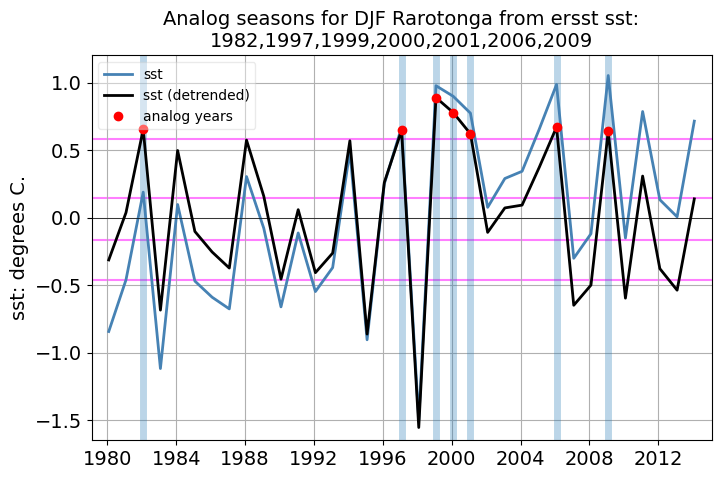

In [14]:
f = p.plot()

In [15]:
p.analogs

,d_anomalies,cat,weights
time,,,
1982-02-01,0.654224,WA,0.153783
1997-02-01,0.646229,WA,0.155682
1999-02-01,0.889802,WA,0.097808
2000-02-01,0.778907,WA,0.124157
2001-02-01,0.621162,WA,0.161638
2006-02-01,0.671265,WA,0.149733
2009-02-01,0.639847,WA,0.157199


In [16]:
p.season

'DJF'

### now instanciate an instance of the `indices` class ... if no parameters, then all the indices are considered  

In [17]:
all_indices = indices(p)

### you first need to call the `composite` method, which will calculate the composite statistics for all the indices for the analog seasons defined in the proxy class instance attributes  

In [18]:
all_indices.composite()

### you can access the table of individual standardized anomalies for all indices by calling the `compos` attribute of the indices instance, like so

In [19]:
all_indices.compos

,NINO34,SOI,IOD,SAM
1982-02-01,0.032729,0.471084,0.544804,1.001330
1997-02-01,-0.365314,0.813785,-0.181042,0.124978
1999-02-01,-1.375472,1.347353,-0.907732,1.252810
2000-02-01,-1.569476,1.066006,0.434085,1.533521
2001-02-01,-0.589422,0.970974,1.131153,-0.816528
2006-02-01,-0.719873,0.415971,-0.851495,-1.017501
2009-02-01,-0.696459,1.319047,0.418646,0.691977


### `compos` is a Pandas DataFrame, so you can save it to disk using the `to_csv` or 'to_excel` method, and you can calculate various column-wise statistics 

In [20]:
all_indices.compos.std()

NINO34    0.555699
SOI       0.372481
IOD       0.760739
SAM       1.001978
dtype: float64

In [21]:
all_indices.compos.median()

NINO34   -0.696459
SOI       0.970974
IOD       0.418646
SAM       0.691977
dtype: float64

### and there's a plot method to the indices instance, which plots a boxplot, and highlight the anomalies significant at the 90% level (signif=0.1)

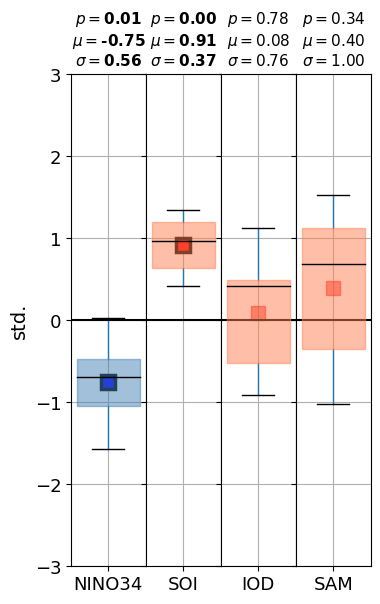

In [22]:
f = all_indices.plot()

### you can change the significance level, e.g. here 99% (alpha=0.01)

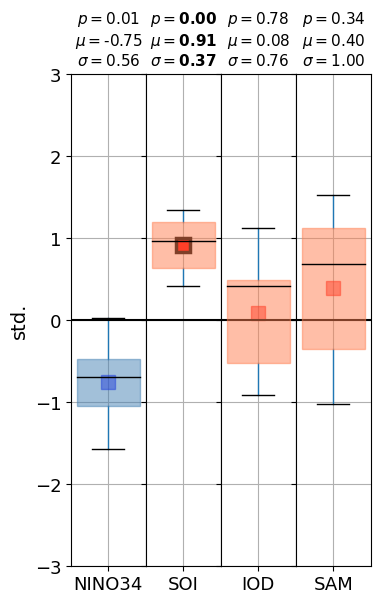

In [23]:
f = all_indices.plot(signif=0.01)

In [24]:
one_indice = indices(p, name = 'SOI')

In [25]:
one_indice.composite()

In [26]:
one_indice.compos

,SOI
1982-02-01,0.471084
1997-02-01,0.813785
1999-02-01,1.347353
2000-02-01,1.066006
2001-02-01,0.970974
2006-02-01,0.415971
2009-02-01,1.319047


### there is no plot method for a single indice though, but you can quickly plot the distribution of standardized anomalies using the pandas dataframe `boxplot` method

Text(0.5, 1.0, 'SOI, mean = +0.91')

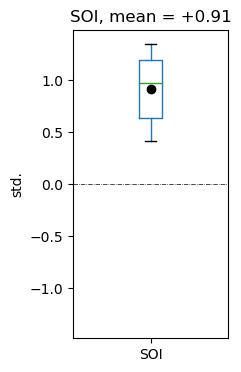

In [27]:
f, ax = plt.subplots(figsize=(2,4)) 
one_indice.compos.boxplot(ax=ax, grid=False)
ax.set_ylim(-one_indice.compos.abs().max()[0] - 0.1 * one_indice.compos.abs().max()[0], \
            one_indice.compos.abs().max()[0] + 0.1 * one_indice.compos.abs().max()[0])

# plots the mean 
ax.plot(1, one_indice.compos.mean().values, 'ko')

ax.axhline(0, color='k', lw=0.5, ls='-.')
ax.set_ylabel('std.')
ax.set_title("{}, mean = {:+4.2f}".format(one_indice.name, one_indice.compos.mean().values[0]))

### and then you can calculate the t-test statistics and p-value like so: 

In [28]:
from scipy.stats import ttest_1samp

In [29]:
ttest, pvalue = ttest_1samp(one_indice.compos, 0)

In [30]:
ttest

array([6.49848941])

In [31]:
pvalue

array([0.00063201])

### in the second example, we use an `ensemble` instance

In [32]:
from paleopy import ensemble

### we need to point to the directory containing the set of individual proxy files constituting the ensemble 

In [33]:
ens_dir_name = 'LIANZSWP'

In [34]:
ens_jsons = pjsons.joinpath(ens_dir_name)

In [35]:
if not ens_jsons.exists(): 
    print(f"ERROR, the directory {ens_jsons} doest not exists")

### instantiates an `ensemble` class, need to pass the season explicitely, so that we can check the consitency between the proxy definitions 

In [36]:
ens = ensemble(djsons=djsons, pjsons=ens_jsons, season='DJF')

### same thing as above, pass the ensemble object to the `indices` class 

In [37]:
all_indices_ensemble = indices(ens)

### you calculate the composite anomalies the same way, and plot is created using the same call to the `plot` method

In [38]:
all_indices_ensemble.composite()

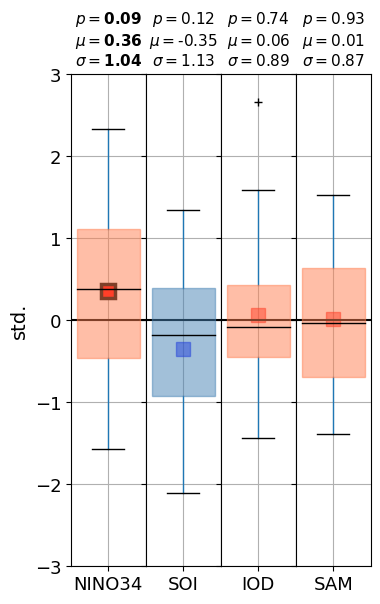

In [39]:
f = all_indices_ensemble.plot()